# CreateBathymetryFromEarthRecon

This jupyter-notebook is used to show how ExoCcycle classes, functions, and methods are used to generate bathymetry models (as shown) and carbon cycle model parameters.

## Add new figure (old figure left in from other JN)
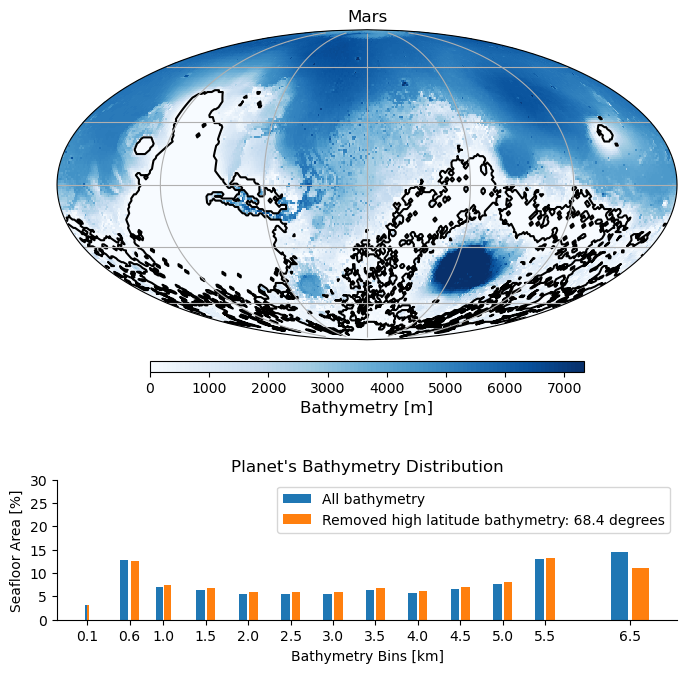

/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


working progress


  0%|                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


80
Check that the output has the correct sign for positive value bathymetry


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.63it/s]


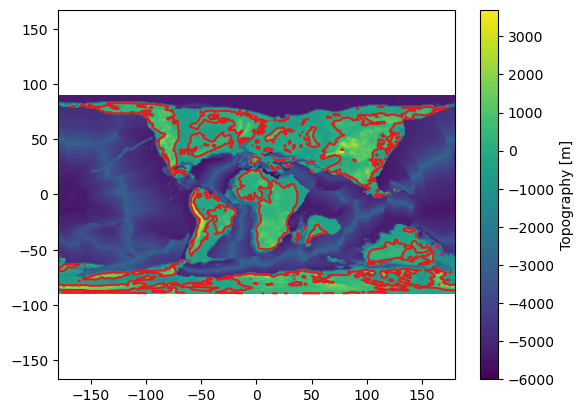

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import matplotlib as mpl
import numpy as np

# Define an input directory dictionary containing all necessary
# directories for the bathymetry reconstruction and analysis.
directories = {"paleoDEMs":"/home/bogumil/Documents/data/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2",
               "oceanLith":"/home/bogumil/Documents/data/Muller_etal_2019_Tectonics_v2.0_netCDF"}
## Notes on name convection of paleoDEMs and oceanLith files.
## paleoDEMs -> [prefix]_[float/int]Ma.nc
## oceanLith -> [prefix]-[float/int].nc


# Create bathymetry object for reconstructing past Earth bathymetry 
EarthReconBathy = EC.Bathymetry.BathyRecon(directories)

# Reconstruction past Earth bathymetry from 0 to 80 Ma in 5 myr increments
# and with a resolution of 1 degree.
#EarthReconBathy.run(startMa=80, endMa=0, deltaMyr=5, resolution=1)
testAge = 80
EarthReconBathy.run(startMa=testAge, endMa=testAge, deltaMyr=5, resolution=1)

# Components that need to be worked on
# EarthReconBathy.run()
# EarthReconBathy.makeNetCDF4()
# EarthReconBathy.addVOCCorrection()
# EarthReconBathy.saveNetCDF4()




# Components that are currently working in the bathymetry reconstuction 
# codes
# 1. Reading in ocean lithospheric age models
# EarthReconBathy.getOceanLithosphereAgeGrid(80, 1, fuzzyAge=True)
# EarthReconBathy.oceanLithAge['lon'][:]
# EarthReconBathy.oceanLithAge['lat'][:]
# EarthReconBathy.oceanLithAge['z'][:]
#
# 2. Adding thermal subsidence defined bathymetry
# EarthReconBathy.addThermalSub(topography, seafloorAge, latitude)
#
# 3. Add isostatic correction for ocean lithosphere and overlaying sediment
# EarthReconBathy.getIsostaticCorrection()
#     EarthReconBathy.getsed()
#
# 4. Reading/Applying in paleoDEMs
# EarthReconBathy.getDEM(80, 1, fuzzyAge=True)
# EarthReconBathy.paleoDEM['lon'][:]
# EarthReconBathy.paleoDEM['lat'][:]
# EarthReconBathy.paleoDEM['z'][:]
#  
# 5. Reading/Applying eustatic sealevel
# EarthReconBathy.getESL(topo, age)
#
# 6. addVOCCorrection() --------------------- NOT DONE
#
# 7. EarthReconBathy.makeNetCDF4() ---------- NOT DONE
#
# 8. EarthReconBathy.saveNetCDF4() ---------- NOT DONE
#
# 9. EarthReconBathy.run()------------------- NOT DONE




In [7]:
#EarthReconBathy.compareLithosphereAndPaleoDEMRecon(age=80, resolution=1, fuzzyAge=True)







array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

In [2]:
'''
# Download topography model (note that is must only be done once per body).
# NOTE: UNCOMMENT THIS SECTION TO DOWNLOAD TOPOGRAPHY MODEL
# marsBathy.getTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",
#                   verbose=False);

# Read topography. This method will generate a topography model netCDF4 file with 
# new_resolution, in degrees. Note that the generated topography model will be 
# cell registered (All calculations from here on out are in cell registered to
# simplify codes and reduce data loss on conversions).
marsBathy.readTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",
                   new_resolution=1,
                   verbose=False);

# Generate a bathymetry model base on a set of input methods and properties. The setSeaLelvel
# method has multiple ways to fill topography with oceans. The two currently implemented at
# the time of this JN creation are as follows:
#     1) basinVolume : An option to define bathymetry by flooding topography with
#                      basinVolume['uncompactedVol'] amount of ocean water, in m3.
#     2) OceanArea : Option to define bathymetry by flooding topography until
#                    oceanArea['area'], decimal percent, of global area is covered
#                    with oceans.
# 
# Here, I use the OceanArea constraint and block the basinVolume constraint with comments.
# 
marsBathy.setSeaLevel(basinVolume = {"on":False, 'uncompactedVol':None},
                      oceanArea = {"on":True, "area":0.7},
                      isostaticCompensation = {"on":False}, verbose=False)

# Note that in this basinVolume example the uncompactedVol was set to the oceanArea
# bathymetry model's VOC, where oceanArea = {"on":True, "area":0.7}. 
#
# marsBathy.setSeaLevel(basinVolume = {"on":True, 'uncompactedVol':3.299187952154623e+17},
#                       oceanArea = {"on":False, "area":0.7},
#                       isostaticCompensation = {"on":False}, verbose=False)


# Save bathymetry model as netCDF4. Note that models will be saved under the same root folder
# that was supplied to the readTopo(...) method.
# 
# only the bathymetry array is saved in this file. Other relevant values are represented
# as vectors (e.g., lat, lon, area-weights, global bathymetery distributions, etc) or
# attributes (e.g., VOC, AOC, high latitude cutoff, etc).
# 
marsBathy.saveBathymetry()

#
# To see a full set of stored netCDF4 values, the user can uncomment the code below
# 
# marsBathy.readBathymetry()
# print(marsBathy.bathync)
# print(marsBathy.bathync.variables)

# Plot bathymetry model
blues_cm = mpl.colormaps['Blues'].resampled(100)
EC.utils.plotGlobal(marsBathy.lat, marsBathy.lon, marsBathy.bathymetry,
                    outputDir = marsBathy.data_dir+"/bathymetries/{}".format(marsBathy.model),
                    fidName = "{}-setSeaLevel_Area0p7.png".format(marsBathy.model),
                    cmapOpts={"cmap":blues_cm,
                              "cbar-title":"cbar-title",
                              "cbar-range":[np.nanmin(np.nanmin(marsBathy.bathymetry)),
                                            np.nanmean(marsBathy.bathymetry)+2*np.nanstd(marsBathy.bathymetry)]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"{}".format(marsBathy.model),
                             "plotZeroContour":True},
                    savePNG = True)


# Plot bathymetry model w/ bathymetry histograms
EC.utils.plotGlobalwHist(marsBathy.lat, marsBathy.lon, marsBathy.bathymetry,
                        marsBathy.binEdges, marsBathy.bathymetryAreaDist_wHighlat, marsBathy.bathymetryAreaDist, marsBathy.highlatlat,
                        outputDir = marsBathy.data_dir+"/bathymetries/{}".format(marsBathy.model),
                        fidName = "{}-setSeaLevel_Area0p7.png".format(marsBathy.model),
                        cmapOpts={"cmap":blues_cm,
                                  "cbar-title":"cbar-title",
                                  "cbar-range":[np.nanmin(np.nanmin(marsBathy.bathymetry)),
                                                np.nanmean(marsBathy.bathymetry)+2*np.nanstd(marsBathy.bathymetry)]},
                        pltOpts={"valueType": "Bathymetry",
                                 "valueUnits": "m",
                                 "plotTitle":"{}".format(marsBathy.model),
                                 "plotZeroContour":True},
                        savePNG = True)
'''


'\n# Download topography model (note that is must only be done once per body).\n# NOTE: UNCOMMENT THIS SECTION TO DOWNLOAD TOPOGRAPHY MODEL\n# marsBathy.getTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",\n#                   verbose=False);\n\n# Read topography. This method will generate a topography model netCDF4 file with \n# new_resolution, in degrees. Note that the generated topography model will be \n# cell registered (All calculations from here on out are in cell registered to\n# simplify codes and reduce data loss on conversions).\nmarsBathy.readTopo("/home/bogumil/Documents/External_fids/ExoCcycle-workspace",\n                   new_resolution=1,\n                   verbose=False);\n\n# Generate a bathymetry model base on a set of input methods and properties. The setSeaLelvel\n# method has multiple ways to fill topography with oceans. The two currently implemented at\n# the time of this JN creation are as follows:\n#     1) basinVolume : An option to define b